[outliers.ipynb](https://github.com/huseinzol05/Stock-Prediction-Models/blob/master/misc/outliers.ipynb)

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import yfinance as yf
import datetime as dt
sns.set()


In [14]:
tesla = yf.download('TSLA', start='2018-03-23', end= dt.datetime.now())
tesla = tesla.reset_index()
tesla.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-03-23,20.750000,20.750000,20.030001,20.102667,20.102667,99823500
1,2018-03-26,20.489332,20.506001,19.424000,20.278667,20.278667,125628000
2,2018-03-27,20.266666,20.284666,18.478666,18.612000,18.612000,208080000
3,2018-03-28,17.638666,17.912001,16.806667,17.185333,17.185333,315021000
4,2018-03-29,17.099333,18.063999,16.547333,17.742001,17.742001,227560500


<Axes: >

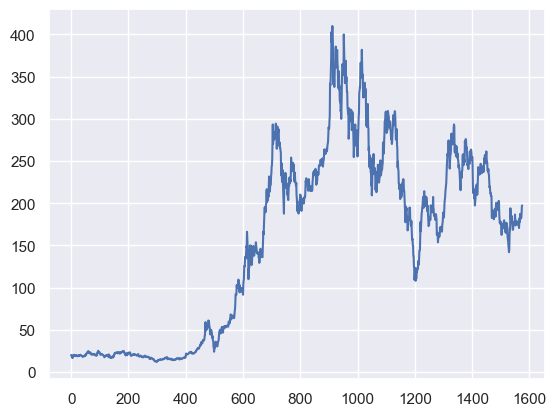

In [15]:
tesla['Close'].plot()

In [16]:
def df_shift(df, lag = 0, start = 1, skip = 1, rejected_columns = []):
    df = df.copy()
    if not lag:
        return df
    cols = { }
    for i in range(start, lag + 1, skip):
        for x in list(df.columns):
            if x not in rejected_columns:
                if not x in cols:
                    cols[x] = ['{}_{}'.format(x, i)]
                else:
                    cols[x].append('{}_{}'.format(x, i))

    for k, v in cols.items():
        columns = v
        dfn = pd.DataFrame(data = None, columns = columns, index = df.index)
        i = (skip - 1)
        for c in columns:
            dfn[c] = df[k].shift(periods = i)
            i+= skip
        
        df = pd.concat([df, dfn], axis=1, keys = [df.index])
    return df
    

Key Changes:  
Simplified Column Shifting: The function now directly creates new columns in the DataFrame for each lag without creating a separate DataFrame (dfn) for each column.  
Removed Incorrect Use of keys in pd.concat: Instead of concatenating DataFrames with keys, the new columns are added directly to the original DataFrame.  

Explanation:  
Iterate over the range from start to lag with steps of skip, creating shifted columns.  
Check rejected_columns: Skip columns that are in the rejected_columns list.  
Add new columns directly: Create new columns for each lag directly in the DataFrame.  
This should resolve the TypeError and achieve the intended functionality of the df_shift function. You can now use this function to shift columns and then compute moving averages as needed.  

In [17]:
def df_shift(df, lag=0, start=1, skip=1, rejected_columns=None):
    if rejected_columns is None:
        rejected_columns = []
        
    df = df.copy()
    if lag == 0:
        return df
    
    for i in range(start, lag + 1, skip):
        for col in df.columns:
            if col not in rejected_columns:
                df[f'{col}_lag{i}'] = df[col].shift(i)
    
    return df

In [18]:
tesla = tesla[['Date', 'Close']]
tesla.head()

,Date,Close
0,2018-03-23,20.102667
1,2018-03-26,20.278667
2,2018-03-27,18.612000
3,2018-03-28,17.185333
4,2018-03-29,17.742001


In [19]:
df_crosscorrelated  = df_shift(tesla, lag = 10, start = 1, skip= 2,rejected_columns=['Date'])
df_crosscorrelated['ma7'] = df_crosscorrelated['Close'].rolling(7).mean()
df_crosscorrelated['ma14'] = df_crosscorrelated['Close'].rolling(14).mean()
df_crosscorrelated['m25'] = df_crosscorrelated['Close'].rolling(25).mean()
df_crosscorrelated

,Date,Close,Close_lag1,Close_lag3,Close_lag1_lag3,Close_lag5,Close_lag1_lag5,Close_lag3_lag5,Close_lag1_lag3_lag5,Close_lag7,...,Close_lag1_lag7_lag9,Close_lag3_lag7_lag9,Close_lag1_lag3_lag7_lag9,Close_lag5_lag7_lag9,Close_lag1_lag5_lag7_lag9,Close_lag3_lag5_lag7_lag9,Close_lag1_lag3_lag5_lag7_lag9,ma7,ma14,m25
0,2018-03-23,20.102667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-03-26,20.278667,20.102667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-03-27,18.612000,20.278667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-03-28,17.185333,18.612000,20.102667,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-03-29,17.742001,17.185333,20.278667,20.102667,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571,2024-06-21,183.009995,181.570007,187.440002,178.009995,182.470001,177.289993,173.789993,177.479996,170.660004,...,176.750000,173.740005,180.110001,186.600006,174.949997,174.839996,173.990005,182.092856,178.612856,178.2932
1572,2024-06-24,182.580002,183.009995,184.860001,187.440002,178.009995,182.470001,170.660004,173.789993,177.289993,...,176.190002,179.240005,173.740005,180.110001,186.600006,177.460007,174.839996,182.848572,179.062143,178.6028
1573,2024-06-25,187.350006,182.580002,181.570007,184.860001,187.440002,178.009995,177.289993,170.660004,182.470001,...,178.789993,176.750000,179.240005,173.740005,180.110001,174.949997,177.460007,183.545715,179.960714,178.9984
1574,2024-06-26,196.369995,187.350006,183.009995,181.570007,184.860001,187.440002,182.470001,177.289993,178.009995,...,178.080002,176.190002,176.750000,179.240005,173.740005,186.600006,174.949997,186.168573,181.487142,179.8552


In [20]:
df_crosscorrelated.keys()

Index(['Date', 'Close', 'Close_lag1', 'Close_lag3', 'Close_lag1_lag3',
       'Close_lag5', 'Close_lag1_lag5', 'Close_lag3_lag5',
       'Close_lag1_lag3_lag5', 'Close_lag7', 'Close_lag1_lag7',
       'Close_lag3_lag7', 'Close_lag1_lag3_lag7', 'Close_lag5_lag7',
       'Close_lag1_lag5_lag7', 'Close_lag3_lag5_lag7',
       'Close_lag1_lag3_lag5_lag7', 'Close_lag9', 'Close_lag1_lag9',
       'Close_lag3_lag9', 'Close_lag1_lag3_lag9', 'Close_lag5_lag9',
       'Close_lag1_lag5_lag9', 'Close_lag3_lag5_lag9',
       'Close_lag1_lag3_lag5_lag9', 'Close_lag7_lag9', 'Close_lag1_lag7_lag9',
       'Close_lag3_lag7_lag9', 'Close_lag1_lag3_lag7_lag9',
       'Close_lag5_lag7_lag9', 'Close_lag1_lag5_lag7_lag9',
       'Close_lag3_lag5_lag7_lag9', 'Close_lag1_lag3_lag5_lag7_lag9', 'ma7',
       'ma14', 'm25'],
      dtype='object')

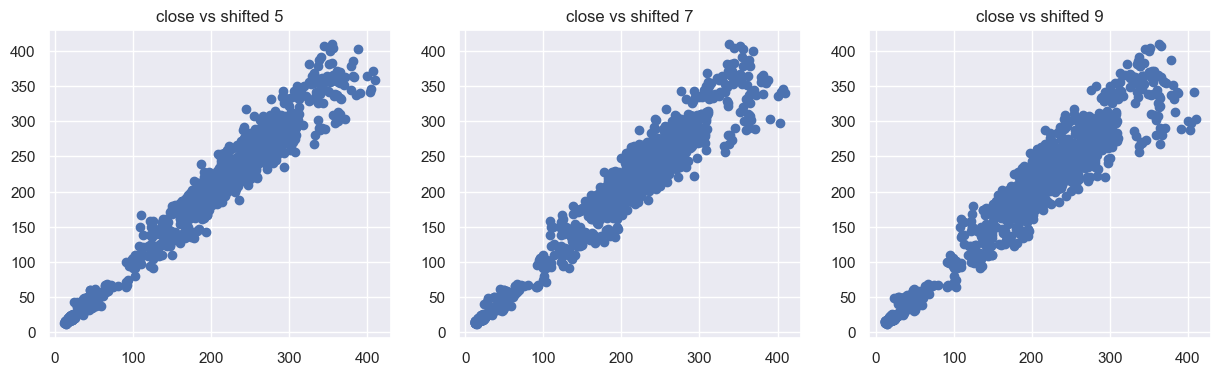

In [21]:
plt.figure(figsize=(15, 4))
plt.subplot(1,3,1)
plt.scatter(df_crosscorrelated['Close'],df_crosscorrelated['Close_lag5'])
plt.title('close vs shifted 5')
plt.subplot(1,3,2)
plt.scatter(df_crosscorrelated['Close'],df_crosscorrelated['Close_lag7'])
plt.title('close vs shifted 7')
plt.subplot(1,3,3)
plt.scatter(df_crosscorrelated['Close'],df_crosscorrelated['Close_lag9'])
plt.title('close vs shifted 9')
plt.show()

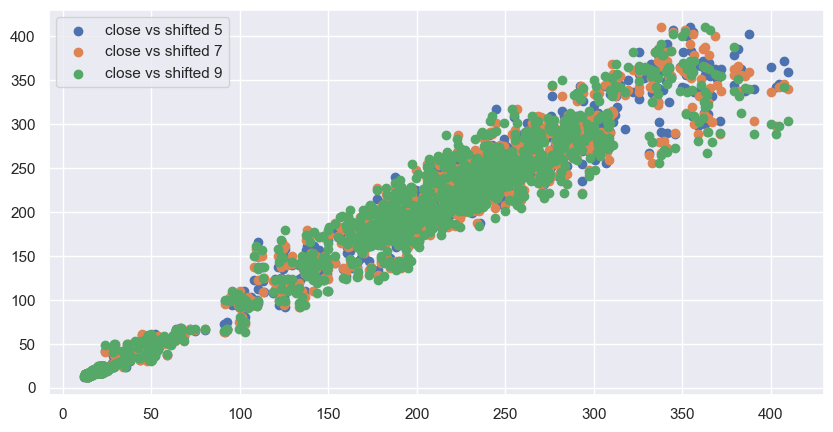

In [22]:
plt.figure(figsize=(10,5))
plt.scatter(df_crosscorrelated['Close'],df_crosscorrelated['Close_lag5'],label='close vs shifted 5')
plt.scatter(df_crosscorrelated['Close'],df_crosscorrelated['Close_lag7'],label='close vs shifted 7')
plt.scatter(df_crosscorrelated['Close'],df_crosscorrelated['Close_lag9'],label='close vs shifted 9')
plt.legend()
plt.show()

In [26]:
df_crosscorrelated.keys()

Index(['Date', 'Close', 'Close_lag1', 'Close_lag3', 'Close_lag1_lag3',
       'Close_lag5', 'Close_lag1_lag5', 'Close_lag3_lag5',
       'Close_lag1_lag3_lag5', 'Close_lag7', 'Close_lag1_lag7',
       'Close_lag3_lag7', 'Close_lag1_lag3_lag7', 'Close_lag5_lag7',
       'Close_lag1_lag5_lag7', 'Close_lag3_lag5_lag7',
       'Close_lag1_lag3_lag5_lag7', 'Close_lag9', 'Close_lag1_lag9',
       'Close_lag3_lag9', 'Close_lag1_lag3_lag9', 'Close_lag5_lag9',
       'Close_lag1_lag5_lag9', 'Close_lag3_lag5_lag9',
       'Close_lag1_lag3_lag5_lag9', 'Close_lag7_lag9', 'Close_lag1_lag7_lag9',
       'Close_lag3_lag7_lag9', 'Close_lag1_lag3_lag7_lag9',
       'Close_lag5_lag7_lag9', 'Close_lag1_lag5_lag7_lag9',
       'Close_lag3_lag5_lag7_lag9', 'Close_lag1_lag3_lag5_lag7_lag9', 'ma7',
       'ma14', 'm25'],
      dtype='object')

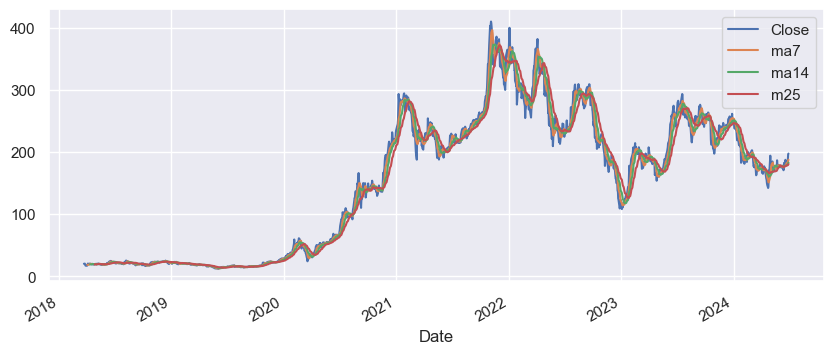

In [28]:
fig, ax = plt.subplots(figsize=(10,4))
df_crosscorrelated.plot(x='Date',y=['Close','ma7','ma14','m25'],ax=ax)
plt.show()

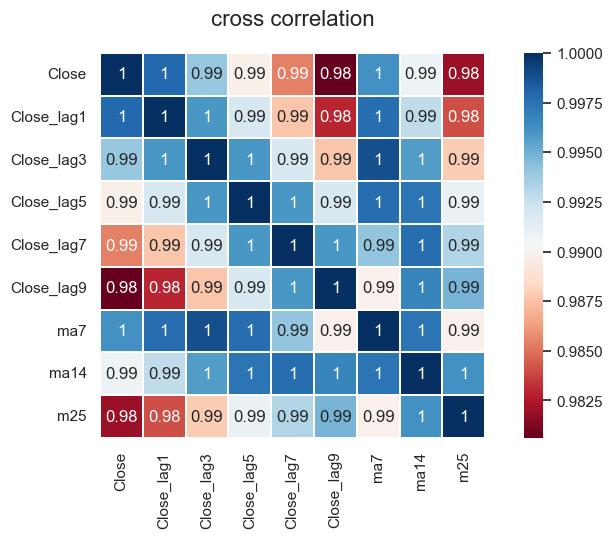

In [39]:
colormap = plt.cm.RdBu
plt.figure(figsize=(10, 5))
ax=plt.subplot(111)
plt.title('cross correlation', y=1.05, size=16)
selected_column = ['Close','Close_lag1','Close_lag3','Close_lag5','Close_lag7','Close_lag9','ma7','ma14','m25']

sns.heatmap(df_crosscorrelated[selected_column].corr(), ax=ax, linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

In [41]:
# TODO:FIX 